In [ ]:
!pip install autoviz
!pip install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 9.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.

In [ ]:
import pandas as pd  # 판다스
import seaborn as sns  # pyplot 업그레이드 버전?
import matplotlib.pyplot as plt
from autoviz import data_cleaning_suggestions
from scipy import stats  # 통계함수와 도구에 중점
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import os

# 토치
import torch
from torch import nn as nn
from torch.nn import functional as F
import pandas as pd

#모델저장
import h5py


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/딥러닝/malicious_phish_10.csv', encoding='ISO-8859-1', on_bad_lines='skip')


ParserError: ignored

In [ ]:
df

""


In [ ]:
print(df)


                                                                                                                           url                                                                                                                       \
0                                                                                                                                                                                                                                  br-icloud.com.br   
1                                                                                                                                                                                                               mp3raid.com/music/krizz_kaliko.html   
2                                                                                                                                                                                                                   bopsecrets.org/rexroth/cr/1.htm   
3           

In [ ]:
df1

,1,http://www.liquidgeneration.com/,Adult
0,2,http://www.onlineanime.org/,Adult
1,3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfirst.html,Adult
2,4,http://www.galeon.com/kmh/,Adult
3,5,http://www.fanworkrecs.com/,Adult
4,6,http://www.animehouse.com/,Adult
...,...,...,...
80656,80658,http://www-unix.oit.umass.edu/~sconstan/,Arts
80657,80659,http://www.island-of-freedom.com/pope1.htm,Arts
80658,80660,http://eserver.org/poetry/essay-on-man/epistle-iii.txt,Arts
80659,80661,http://eserver.org/poetry/essay-on-man/epistle-i.txt,Arts


In [ ]:
# 데이터 전처리
X = df['url']
y = df['type']


In [ ]:
# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
df['url'].describe()

count                                                                      651181
unique                                                                     641108
top       http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css
freq                                                                          180
Name: url, dtype: object

In [ ]:
df["type"].describe()

count     651181
unique         4
top       benign
freq      428103
Name: type, dtype: object

In [ ]:
np.unique(y)

array([0, 1, 2, 3])

([<matplotlib.patches.Wedge at 0x7c896bdea650>,
 [Text(-0.5221155085238269, 0.9681918176471571, 'Benign'),
  Text(-0.12765302896934178, -1.0925679403107857, 'Defacement'),
  Text(0.7914086605775283, -0.7639845102898899, 'Phishing'),
  Text(1.0864895865939377, -0.17187314572944393, 'Malware')])

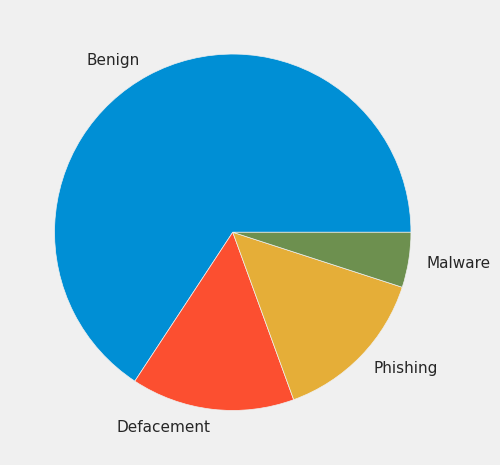

In [ ]:
lis=[df["type"].value_counts()[0],df["type"].value_counts()[1],df["type"].value_counts()[2],df["type"].value_counts()[3]]
plt.pie(lis,labels=["Benign","Defacement","Phishing","Malware"])

<Axes: xlabel='type', ylabel='count'>

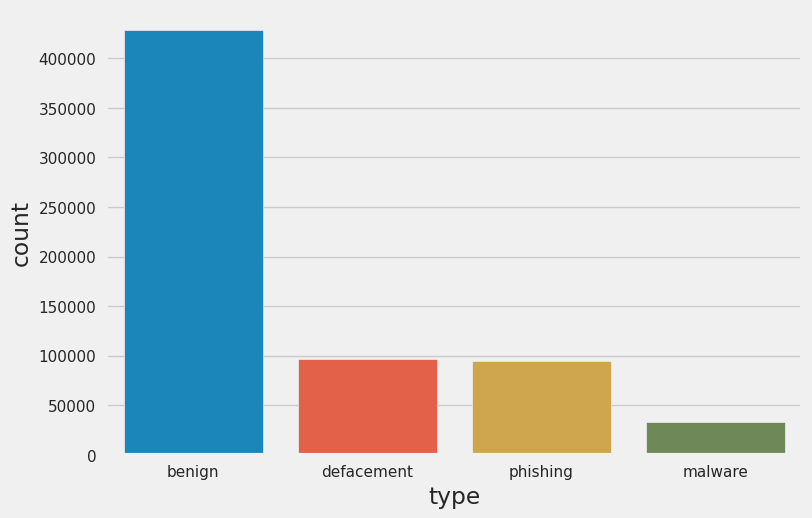

In [ ]:
sns.countplot(x = 'type', data = df, order = df['type'].value_counts().index)

# ML

In [ ]:
url_data = df.copy()

In [ ]:
url_data['url'] = url_data['url'].replace('www.', '', regex=True)
url_data['url'] = url_data['url'].replace('http://', '', regex=True)
url_data['url'] = url_data['url'].replace('https://', '', regex=True)
url_data['url'] = url_data['url'].replace('.html', '', regex=True)
url_data['url'] = url_data['url'].replace('.htm', '', regex=True)

url_data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko,benign
2,bopsecrets.org/rexroth/cr/1,benign
3,garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement
4,adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement


In [ ]:
url_data["url_type"] = url_data["type"].replace({
    'benign':0,
    'defacement':1,
    'phishing':2,
    'malware':3
})
url_data["bw"] = url_data["type"].replace({
    'benign':0,
    'defacement':1,
    'phishing':1,
    'malware':1
})

In [ ]:
import re
reg = re.compile('^(.*?)\/')
def pri_domain(text):
  temp = reg.findall(text)
  if temp:
    return temp[0]
  else:
    return text
url_data['pri_domain'] = url_data['url'].apply(pri_domain)

이 코드는 Python에서 정규 표현식을 사용하여 주어진 URL에서 기본 도메인(Primary Domain)을 추출하여 DataFrame에 새로운 열로 추가하는 작업을 수행합니다. 아래는 코드의 각 부분에 대한 설명입니다:

1. `import re`: Python의 정규 표현식 모듈인 `re`를 임포트합니다.

2. `reg = re.compile('^(.*?)\/')`: 정규 표현식 패턴을 정의합니다. 이 패턴은 URL 문자열에서 슬래시(`/`)로 시작하는 부분을 추출하는 역할을 합니다. `^`는 문자열의 시작을 의미하며, `(.*?)`는 임의의 문자(0번 이상)를 나타내고, `\/`는 슬래시 문자를 의미합니다.

3. `pri_domain(text)`: URL 문자열에서 기본 도메인을 추출하는 함수를 정의합니다. 이 함수는 주어진 `text` URL 문자열에 정규 표현식 패턴을 적용하여 기본 도메인을 추출합니다.

4. `temp = reg.findall(text)`: 정규 표현식 패턴을 사용하여 URL 문자열에서 패턴과 일치하는 부분을 찾습니다. 이 부분은 `temp`에 저장됩니다.

5. `if temp:`: `temp`에 결과가 있다면(일치하는 부분이 있다면) 아래의 코드를 실행합니다.

6. `return temp[0]`: 첫 번째 일치하는 부분을 반환하여 기본 도메인으로 설정합니다.

7. 그렇지 않으면 원래 URL 문자열을 반환합니다.

8. `url_data['pri_domain'] = url_data['url'].apply(pri_domain)`: DataFrame의 'url' 열에 있는 각 URL 문자열에 대해 `pri_domain` 함수를 적용하여 'pri_domain' 열을 새로 추가합니다. 이 열은 URL에서 추출된 기본 도메인을 포함하게 됩니다.

이 코드는 DataFrame의 URL 열에서 기본 도메인을 추출하여 새로운 열에 저장하는데 사용됩니다. 이를 통해 데이터 분석 및 처리에 유용한 정보를 추출할 수 있습니다.

In [ ]:
url_data

,url,type,url_type,bw,pri_domain
0,br-icloud.com.br,phishing,2,1,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko,benign,0,0,mp3raid.com
2,bopsecrets.org/rexroth/cr/1,benign,0,0,bopsecrets.org
3,garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,1,1,garage-pirenne.be
4,adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,1,1,adventure-nicaragua.net
...,...,...,...,...,...
651176,xbox360.ign.com/objects/850/850402,phishing,2,1,xbox360.ign.com
651177,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,1,games.teamxbox.com
651178,gamespot.com/xbox360/action/deadspace/,phishing,2,1,gamespot.com
651179,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,1,en.wikipedia.org


In [ ]:
url_data

,url,type,url_type,bw,pri_domain
0,br-icloud.com.br,phishing,2,1,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko,benign,0,0,mp3raid.com
2,bopsecrets.org/rexroth/cr/1,benign,0,0,bopsecrets.org
3,garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,1,1,garage-pirenne.be
4,adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,1,1,adventure-nicaragua.net
...,...,...,...,...,...
651176,xbox360.ign.com/objects/850/850402,phishing,2,1,xbox360.ign.com
651177,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,1,games.teamxbox.com
651178,gamespot.com/xbox360/action/deadspace/,phishing,2,1,gamespot.com
651179,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,1,en.wikipedia.org


In [ ]:
def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters
def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits
def count_special_chars(url):
    special_chars = "!@#$%^&*()_+-=[]{};:,.<>/?`~|"
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars


이 코드는 주어진 URL 문자열에서 문자, 숫자 및 특수 문자의 개수를 세는 세 가지 함수를 정의합니다. 각 함수는 URL 문자열을 받아 해당 문자 유형의 개수를 반환합니다.

1. `count_letters(url)` 함수:

   - `url` 문자열에서 알파벳 문자의 개수를 세는 함수입니다.
   - `char.isalpha()`를 사용하여 문자열에서 문자인 문자를 세고, `sum()` 함수를 사용하여 개수를 합산합니다.

2. `count_digits(url)` 함수:

   - `url` 문자열에서 숫자의 개수를 세는 함수입니다.
   - `char.isdigit()`를 사용하여 문자열에서 숫자인 문자를 세고, `sum()` 함수를 사용하여 개수를 합산합니다.

3. `count_special_chars(url)` 함수:

   - `url` 문자열에서 특수 문자의 개수를 세는 함수입니다.
   - `special_chars` 문자열에 포함된 특수 문자를 확인하고, `char in special_chars`를 사용하여 문자열에서 특수 문자를 세고, `sum()` 함수를 사용하여 개수를 합산합니다.

이러한 함수들은 주어진 URL 문자열에서 원하는 종류의 문자 수를 쉽게 세는 데 사용될 수 있으며, 데이터 분석, 유효성 검사 및 문자열 처리와 관련된 다양한 작업에 유용할 수 있습니다.

In [ ]:
url_data['len'] = df['url'].apply(len)


In [ ]:
url_data['letters_count'] =url_data['url'].apply(lambda x: count_letters(x))
url_data['digits_count']  =url_data['url'].apply(lambda x: count_digits(x))
url_data['special_chars_count']  =url_data['url'].apply(lambda x: count_special_chars(x))

In [ ]:
def has_shortening_service(url):
    pattern = re.compile(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                         r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                         r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                         r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                         r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                         r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                         r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                         r'tr\.im|link\.zip\.net')
    match = pattern.search(url)
    return int(bool(match))

이 코드는 Python의 정규 표현식을 사용하여 URL 문자열에 짧은 URL 단축 서비스의 도메인이 포함되어 있는지 여부를 확인하는 함수를 정의합니다. 함수의 이름은 `has_shortening_service`이며, 입력으로 URL 문자열을 받아 해당 URL에 짧은 URL 단축 서비스 도메인이 포함되어 있는 경우 1을 반환하고, 그렇지 않은 경우 0을 반환합니다.

해당 코드의 주요 구성 요소:

- `re.compile()`을 사용하여 정규 표현식 패턴을 설정합니다. 이 패턴은 다양한 짧은 URL 단축 서비스의 도메인 이름을 정의합니다.

- `pattern.search(url)`을 사용하여 URL 문자열에서 정규 표현식 패턴과 일치하는 부분을 찾습니다.

- `int(bool(match))`를 사용하여 `match` 객체가 None이 아닌 경우(일치하는 부분이 있는 경우) 1을 반환하고, 그렇지 않은 경우(일치하는 부분이 없는 경우) 0을 반환합니다.

이 함수는 주어진 URL이 짧은 URL 단축 서비스인지 아닌지를 판별하는 데 사용될 수 있습니다. 예를 들어, `has_shortening_service("https://bit.ly/abc123")`를 호출하면 1을 반환하고, `has_shortening_service("https://example.com/longurl")`를 호출하면 0을 반환할 것입니다.

In [ ]:
url_data['shortened']  =url_data['url'].apply(lambda x: has_shortening_service(x))

In [ ]:
from urllib.parse import urlparse
def abnormal_url(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    if hostname:
        hostname = str(hostname)
        match = re.search(hostname, url)
        if match:
            return 1
    return 0

이 코드는 Python의 `urllib.parse` 라이브러리를 사용하여 주어진 URL이 호스트 이름과 일치하는지 확인하는 함수를 정의합니다. 이 함수는 `abnormal_url`이라고 명명되었으며, URL을 입력으로 받아 호스트 이름과 URL이 일치하면 1을 반환하고, 그렇지 않으면 0을 반환합니다. 아래는 코드의 각 부분에 대한 설명입니다:

1. `from urllib.parse import urlparse`: Python의 `urllib.parse` 모듈에서 `urlparse` 함수를 임포트합니다. 이 함수는 URL을 구문 분석하고 그 구성 요소를 추출합니다.

2. `def abnormal_url(url)`: `abnormal_url` 함수를 정의합니다. 이 함수는 URL 문자열을 입력으로 받습니다.

3. `parsed_url = urlparse(url)`: 입력된 URL을 파싱하여 URL 구성 요소를 추출합니다. `parsed_url`에 파싱된 정보가 저장됩니다.

4. `hostname = parsed_url.hostname`: 파싱된 URL에서 호스트 이름을 추출하고 `hostname` 변수에 저장합니다. 호스트 이름은 URL의 도메인 부분을 나타냅니다.

5. `if hostname:`: 호스트 이름이 존재하는 경우(비어 있지 않은 경우) 아래의 코드를 실행합니다.

6. `hostname = str(hostname)`: 호스트 이름을 문자열로 변환합니다.

7. `match = re.search(hostname, url)`: 정규 표현식 패턴을 사용하여 호스트 이름이 URL에 존재하는지 확인합니다. `re.search()` 함수를 사용하여 URL 문자열에서 호스트 이름과 일치하는 부분을 찾습니다.

8. `if match:`: 호스트 이름과 일치하는 부분이 URL에서 발견된 경우 아래의 코드를 실행하고 1을 반환합니다.

9. 그렇지 않으면, 호스트 이름이 URL에 일치하지 않으므로 0을 반환합니다.

이 함수를 호출하면 주어진 URL에서 호스트 이름과 URL이 일치하는지 여부를 확인할 수 있습니다. 이것은 URL의 유효성을 검사하거나 이상한 URL을 식별하는 데 사용될 수 있습니다.

In [ ]:
url_data['abnormal_url']  =df['url'].apply(lambda x: abnormal_url(x))

In [ ]:
url_data['abnormal_url'].sum()

187990

In [ ]:
urlparse(df['url'][555183]).hostname

'219.155.142.211'

In [ ]:
url_data.loc[url_data['abnormal_url']==1]

,url,type,url_type,bw,pri_domain,len,letters_count,digits_count,special_chars_count,shortened,abnormal_url
3,garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,1,1,garage-pirenne.be,88,56,7,14,0,1
4,adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,1,1,adventure-nicaragua.net,235,195,22,11,0,1
5,buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2,benign,0,0,buzzfil.net,118,85,1,20,0,1
8,pashminaonline.com/pure-pashminas,defacement,1,1,pashminaonline.com,44,30,0,3,0,1
11,ikenmijnkunst.nl/index.php/exposities/exposities-2006,defacement,1,1,ikenmijnkunst.nl,64,43,4,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
555181,211.137.225.95:47475/Mozi.m,malware,3,1,211.137.225.95:47475,34,5,16,6,0,1
555182,115.55.246.246:44661/Mozi.m,malware,3,1,115.55.246.246:44661,34,5,16,6,0,1
555183,219.155.142.211:55621/Mozi.m,malware,3,1,219.155.142.211:55621,35,5,17,6,0,1
555184,42.238.164.8:48848/Mozi.m,malware,3,1,42.238.164.8:48848,32,5,14,6,0,1


In [ ]:
def have_ip_address(url):
    pattern = r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
              r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
              r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
              r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
              r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' \
              r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|' \
              r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)|' \
              r'((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)'

    match = re.search(pattern, url)
    if match:
        return 1
    else:
        return 0

In [ ]:
url_data['have_ip']  =url_data['url'].apply(lambda x: have_ip_address(x))


In [ ]:
url_data['have_ip'].sum()

12488

In [ ]:
url_data.isnull

<bound method DataFrame.isnull of                                                                                                                         url                                                                                                                   \
0                                                                                                                                                                                                                           br-icloud.com.br   
1                                                                                                                                                                                                             mp3raid.com/music/krizz_kaliko   
2                                                                                                                                                                                                                bopsecrets.org/rexroth/cr/1   
3     

In [ ]:
def get_url_region(primary_domain):
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }

    for ccTLD in ccTLD_to_region:
        if primary_domain.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]

    return "Global"

In [ ]:
url_data['url_region'] = url_data['pri_domain'].apply(lambda x: get_url_region(str(x)))

In [ ]:
!pip install tldextract

In [ ]:
import tldextract
def extract_root_domain(url):
    extracted = tldextract.extract(url)
    root_domain = extracted.domain
    return root_domain

이 코드는 Python의 `tldextract` 라이브러리를 사용하여 주어진 URL에서 루트 도메인을 추출하는 함수를 정의합니다. `tldextract` 라이브러리는 URL에서 최상위 도메인(TLD), 도메인 이름(Domain), 서브도메인(Subdomain)을 추출하는 데 유용한 도구입니다. 아래는 코드의 각 부분에 대한 설명입니다:

1. `import tldextract`: `tldextract` 라이브러리를 임포트합니다. 이 라이브러리는 URL에서 도메인 관련 정보를 추출하는 데 사용됩니다.

2. `def extract_root_domain(url)`: `extract_root_domain` 함수를 정의합니다. 이 함수는 URL 문자열을 입력으로 받아서 루트 도메인을 추출합니다.

3. `extracted = tldextract.extract(url)`: `tldextract.extract()` 함수를 사용하여 URL에서 TLD, 도메인 및 서브도메인을 추출합니다. `extracted` 변수에 추출된 정보를 저장합니다.

4. `root_domain = extracted.domain`: 추출된 정보에서 도메인 이름(루트 도메인)을 `root_domain` 변수에 저장합니다.

5. `return root_domain`: 루트 도메인을 반환합니다.

이 함수를 호출하면 주어진 URL에서 루트 도메인이 추출되어 반환됩니다. 예를 들어, `extract_root_domain("https://www.example.com")`를 호출하면 "example"가 반환될 것입니다. 이러한 함수를 사용하면 URL에서 도메인 관련 정보를 추출하여 데이터 분석 및 처리에 활용할 수 있습니다.

In [ ]:
url_data['root_domain'] = url_data['pri_domain'].apply(lambda x: extract_root_domain(str(x)))

In [ ]:
url_data.isnull().sum()

url                    0
type                   0
url_type               0
bw                     0
pri_domain             0
len                    0
letters_count          0
digits_count           0
special_chars_count    0
shortened              0
abnormal_url           0
have_ip                0
url_region             0
root_domain            0
dtype: int64

In [ ]:
url_data.duplicated().sum()

10067

In [ ]:
url_data.drop_duplicates(inplace=True)

In [ ]:
url_data

,url,type,url_type,bw,pri_domain,len,letters_count,digits_count,special_chars_count,shortened,abnormal_url,have_ip,url_region,root_domain
0,br-icloud.com.br,phishing,2,1,br-icloud.com.br,16,13,0,3,0,0,0,Brazil,br-icloud
1,mp3raid.com/music/krizz_kaliko,benign,0,0,mp3raid.com,35,25,1,4,0,0,0,Global,mp3raid
2,bopsecrets.org/rexroth/cr/1,benign,0,0,bopsecrets.org,31,22,1,4,0,0,0,Global,bopsecrets
3,garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,1,1,garage-pirenne.be,88,56,7,14,0,1,0,Belgium,garage-pirenne
4,adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,1,1,adventure-nicaragua.net,235,195,22,11,0,1,0,Global,adventure-nicaragua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651176,xbox360.ign.com/objects/850/850402,phishing,2,1,xbox360.ign.com,39,17,12,5,0,0,0,Global,ign
651177,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,1,games.teamxbox.com,44,29,7,8,1,0,0,Global,teamxbox
651178,gamespot.com/xbox360/action/deadspace/,phishing,2,1,gamespot.com,42,30,3,5,1,0,0,Global,gamespot
651179,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,1,en.wikipedia.org,45,36,0,9,0,0,0,Global,wikipedia


In [ ]:
url_data[url_data['root_domain'] == 'wikipedia']['type'].value_counts()

benign      12876
phishing      550
Name: type, dtype: int64

In [ ]:
url_data.to_csv("url_data_preprocessed_10_25.csv")

# 로드 데이터

In [ ]:
url_data = pd.read_csv('url_data_preprocessed_10_25.csv')

In [ ]:
url_data

,Unnamed: 0,url,type,url_type,bw,pri_domain,len,letters_count,digits_count,special_chars_count,shortened,abnormal_url,have_ip,url_region,root_domain
0,0,br-icloud.com.br,phishing,2,1,br-icloud.com.br,16,13,0,3,0,0,0,Brazil,br-icloud
1,1,mp3raid.com/music/krizz_kaliko,benign,0,0,mp3raid.com,35,25,1,4,0,0,0,Global,mp3raid
2,2,bopsecrets.org/rexroth/cr/1,benign,0,0,bopsecrets.org,31,22,1,4,0,0,0,Global,bopsecrets
3,3,garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,1,1,garage-pirenne.be,88,56,7,14,0,1,0,Belgium,garage-pirenne
4,4,adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,1,1,adventure-nicaragua.net,235,195,22,11,0,1,0,Global,adventure-nicaragua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641109,651176,xbox360.ign.com/objects/850/850402,phishing,2,1,xbox360.ign.com,39,17,12,5,0,0,0,Global,ign
641110,651177,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,1,games.teamxbox.com,44,29,7,8,1,0,0,Global,teamxbox
641111,651178,gamespot.com/xbox360/action/deadspace/,phishing,2,1,gamespot.com,42,30,3,5,1,0,0,Global,gamespot
641112,651179,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,1,en.wikipedia.org,45,36,0,9,0,0,0,Global,wikipedia


In [ ]:
import hashlib
def hash_encode(category):
    hash_object = hashlib.md5()
    hash_object.update(category.encode(encoding='utf-8'))
    return int(hash_object.hexdigest(), 16) % (10 ** 8)

In [ ]:
# Apply hash encoding to the categorical feature
url_data['root_domain'] = url_data['root_domain'].astype(str)
url_data['url_region'] = url_data['url_region'].astype(str)

url_data['root_domain'] = url_data['root_domain'].apply(hash_encode)
url_data['url_region'] = url_data['url_region'].apply(hash_encode)

In [ ]:
url_data.columns

Index(['Unnamed: 0', 'url', 'type', 'url_type', 'bw', 'pri_domain', 'len',
       'letters_count', 'digits_count', 'special_chars_count', 'shortened',
       'abnormal_url', 'have_ip', 'url_region', 'root_domain'],
      dtype='object')

In [ ]:
dftest = url_data.drop(['Unnamed: 0', 'url', 'type','pri_domain'], axis=1)

In [ ]:
dftest[['len', 'letters_count', 'digits_count', 'special_chars_count', 'url_region', 'root_domain']]

,len,letters_count,digits_count,special_chars_count,url_region,root_domain
0,16,13,0,3,27739261,1310791
1,35,25,1,4,32604616,58335668
2,31,22,1,4,32604616,28611805
3,88,56,7,14,71484583,89045308
4,235,195,22,11,32604616,76838614
...,...,...,...,...,...,...
641109,39,17,12,5,32604616,47632402
641110,44,29,7,8,32604616,33842502
641111,42,30,3,5,32604616,61429360
641112,45,36,0,9,32604616,41540124


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(dftest[['len', 'letters_count', 'digits_count', 'special_chars_count', 'url_region', 'root_domain']])
dftest[['len', 'letters_count', 'digits_count', 'special_chars_count', 'url_region', 'root_domain']] = scaler_.transform(dftest[['len', 'letters_count', 'digits_count', 'special_chars_count', 'url_region', 'root_domain']])
dftest

,url_type,bw,len,letters_count,digits_count,special_chars_count,shortened,abnormal_url,have_ip,url_region,root_domain
0,2,1,0.006900,0.006080,0.000000,0.00813,0,0,0,0.275105,0.013106
1,0,0,0.015639,0.011693,0.000831,0.01084,0,0,0,0.324004,0.583357
2,0,0,0.013799,0.010290,0.000831,0.01084,0,0,0,0.324004,0.286117
3,1,1,0.040018,0.026193,0.005814,0.03794,0,1,0,0.714764,0.890454
4,1,1,0.107636,0.091207,0.018272,0.02981,0,1,0,0.324004,0.768387
...,...,...,...,...,...,...,...,...,...,...,...
641109,2,1,0.017479,0.007951,0.009967,0.01355,0,0,0,0.324004,0.476324
641110,2,1,0.019779,0.013564,0.005814,0.02168,1,0,0,0.324004,0.338424
641111,2,1,0.018859,0.014032,0.002492,0.01355,1,0,0,0.324004,0.614294
641112,2,1,0.020239,0.016838,0.000000,0.02439,0,0,0,0.324004,0.415401


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
x = dftest.drop(columns=['url_type','bw'])
y = dftest['url_type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
x

,len,letters_count,digits_count,special_chars_count,shortened,abnormal_url,have_ip,url_region,root_domain
0,0.006900,0.006080,0.000000,0.00813,0,0,0,0.275105,0.013106
1,0.015639,0.011693,0.000831,0.01084,0,0,0,0.324004,0.583357
2,0.013799,0.010290,0.000831,0.01084,0,0,0,0.324004,0.286117
3,0.040018,0.026193,0.005814,0.03794,0,1,0,0.714764,0.890454
4,0.107636,0.091207,0.018272,0.02981,0,1,0,0.324004,0.768387
...,...,...,...,...,...,...,...,...,...
641109,0.017479,0.007951,0.009967,0.01355,0,0,0,0.324004,0.476324
641110,0.019779,0.013564,0.005814,0.02168,1,0,0,0.324004,0.338424
641111,0.018859,0.014032,0.002492,0.01355,1,0,0,0.324004,0.614294
641112,0.020239,0.016838,0.000000,0.02439,0,0,0,0.324004,0.415401


In [ ]:
y

0         2
1         0
2         0
3         1
4         1
         ..
641109    2
641110    2
641111    2
641112    2
641113    2
Name: url_type, Length: 641114, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.pipeline import Pipeline



classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(),
    GaussianNB()
]

In [ ]:
results = []
for classifier in classifiers:
    # Create a pipeline with the scaler and classifier
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    # Perform cross-validation using the pipeline
    scores = cross_val_score(pipeline, x, y, cv=2, scoring='accuracy')
    # Calculate additional evaluation metrics
    y_pred = cross_val_predict(pipeline, x, y, cv=2)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted', zero_division=1)  # Set zero_division=1
    f1 = f1_score(y, y_pred, average='weighted')
    # Append the results to the list
    results.append((classifier.__class__.__name__, accuracy, recall, precision, f1))

KeyboardInterrupt: ignored

In [ ]:
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
results = results.sort_values(by='Accuracy', ascending=False)
results

# DL

In [ ]:
import torch
from torch.nn import GRU
from torch import nn
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance



# GRU 모델 정의
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRUModel, self).__init__()
        self.gru = GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # GPU 지원 가능 확인

# Initialize the GRU model
model = GRUModel(input_dim=9, hidden_dim=256, num_layers=3, output_dim=4).to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # Categorical Cross-Entropy 손실
# criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저
# lr=0.001은 학습률을 0.001로 설정한 것입니다. 이 값은 일반적으로 사용되는 학습률 중 하나이며, 신경망 모델을 효과적으로 학습시키는 데 사용됩니다
# eta?


# Prepare data
x = dftest[['len', 'letters_count', 'digits_count', 'special_chars_count','shortened','abnormal_url', 'have_ip', 'url_region', 'root_domain']].values
y = dftest['url_type'].values

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

# Convert to tensor
x_train = torch.tensor(x_train, dtype=torch.float32).unsqueeze(-2)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(-2)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create dataloaders
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)


correct = 0
total = 0

best_model_path = '/content/drive/MyDrive/10_25모델/GRU_10_25-2.pth' #모델 저장할 경로
best_accuracy = 0.0  # 최고 정확도를 추적할 변수 초기화
epochs= 20

# Training loop
for epoch in range(epochs):  # Define the number of epochs
    total_loss = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # 정확도 계산
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 매 스텝마다 정확도 출력
        step_accuracy = 100 * correct / total
        print(f'에포크 [{epoch + 1}/{epochs}], 스텝 [{i + 1}/{len(train_loader)}], 손실: {loss.item():.4f}, 정확도: {step_accuracy:.2f}%')

    average_loss = total_loss / len(train_loader)
    accuracy = 100 * correct / total  # 정확도 계산
    print(f'에포크 [{epoch + 1}/{epochs}], 평균 손실: {average_loss:.4f}, 정확도: {accuracy:.2f}%')




# 현재 모델의 검증 정확도를 계산 (검증 데이터를 사용하여 계산)
model.eval()
with torch.no_grad():
    val_correct = 0
    val_total = 0
    for val_inputs, val_labels in test_loader:
        val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
        val_outputs = model(val_inputs)
        _, val_predicted = torch.max(val_outputs, 1)
        val_total += val_labels.size(0)
        val_correct += (val_predicted == val_labels).sum().item()
    val_accuracy = 100 * val_correct / val_total
    print(f'검증 정확도: {val_accuracy:.2f}%')
model.train()

# 만약 현재 검증 정확도가 최고 정확도보다 높으면 모델을 저장
if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    torch.save(model.state_dict(), best_model_path)
    print('모델 저장: 검증 정확도가 향상되었습니다.')

print('훈련 완료')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
에포크 [159/159], 스텝 [11033/16028], 손실: 0.2049, 정확도: 92.36%
에포크 [159/159], 스텝 [11034/16028], 손실: 0.2537, 정확도: 92.36%
에포크 [159/159], 스텝 [11035/16028], 손실: 0.1189, 정확도: 92.36%
에포크 [159/159], 스텝 [11036/16028], 손실: 0.0635, 정확도: 92.36%
에포크 [159/159], 스텝 [11037/16028], 손실: 0.1165, 정확도: 92.36%
에포크 [159/159], 스텝 [11038/16028], 손실: 0.2009, 정확도: 92.36%
에포크 [159/159], 스텝 [11039/16028], 손실: 0.1909, 정확도: 92.36%
에포크 [159/159], 스텝 [11040/16028], 손실: 0.0384, 정확도: 92.36%
에포크 [159/159], 스텝 [11041/16028], 손실: 0.2062, 정확도: 92.36%
에포크 [159/159], 스텝 [11042/16028], 손실: 0.3779, 정확도: 92.36%
에포크 [159/159], 스텝 [11043/16028], 손실: 0.1166, 정확도: 92.36%
에포크 [159/159], 스텝 [11044/16028], 손실: 0.1101, 정확도: 92.36%
에포크 [159/159], 스텝 [11045/16028], 손실: 0.2764, 정확도: 92.36%
에포크 [159/159], 스텝 [11046/16028], 손실: 0.0852, 정확도: 92.36%
에포크 [159/159], 스텝 [11047/16028], 손실: 0.1814, 정확도: 92.36%
에포크 [159/159], 스텝 [11048/16028], 손실: 0.2280, 정확도: 92.36%
에포크 [159/159], 스텝 [11049/16028], 손실: 0.2328, 정확도: 92

In [ ]:
import torch
from torch.nn import GRU, Dropout, BatchNorm1d
from torch import nn
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset
from sklearn.inspection import permutation_importance
from collections import deque

# 수정된 하이퍼파라미터 설정
input_dim = 9
hidden_dim = 128
num_layers = 2
output_dim = 4
lr = 0.01
epochs = 10
batch_size = 32
dropout_prob = 0.2  # 드롭아웃 확률
learning_rate_decay = 0.9  # 학습률 감소 비율
weight_decay = 1e-5  # L2 가중치 감소 (weight decay)
momentum = 0.9  # 모멘텀 (SGD 옵티마이저에만 적용)
xavier_init = True  # Xavier 가중치 초기화 사용

# GRU 모델 정의
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(GRUModel, self).__init__()
        self.gru = GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = Dropout(dropout_prob)
        self.batch_norm = BatchNorm1d(hidden_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.batch_norm(out[:, -1, :])  # 배치 정규화
        out = self.dropout(out)  # 드롭아웃
        out = self.fc(out)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # GPU 지원 가능 확인

# 데이터 준비
x = dftest[['len', 'letters_count', 'digits_count', 'special_chars_count','shortened','abnormal_url', 'have_ip', 'url_region', 'root_domain']].values
y = dftest['url_type'].values

# 모델 초기화
model = GRUModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob).to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # Categorical Cross-Entropy 손실
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)

# 학습률 스케줄러 정의 (예: 스텝 스케줄러)
step_lr_scheduler = StepLR(optimizer, step_size=3, gamma=learning_rate_decay)

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

# 데이터를 PyTorch 텐서로 변환
x_train = torch.tensor(x_train, dtype=torch.float32).unsqueeze(-2)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(-2)
y_test = torch.tensor(y_test, dtype=torch.long)

# DataLoader 생성
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# 초기화
correct = 0
total = 0

# 모델 저장 경로 설정
best_model_path = '/content/drive/MyDrive/10_25모델/GRU_kfold.pth'

# Early Stopping 관련 변수 초기화
best_accuracy = 0.0
best_stopped_epoch = -1
stopped_epochs = 5  # 몇 번의 연속된 에포크에서 검증 정확도가 향상되지 않으면 멈출 것인지 설정
early_stopping = False  # 조기 종료 여부를 나타내는 플래그

# Training loop
model.train()
for epoch in range(epochs):
    total_loss = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        step_lr_scheduler.step()  # 학습률 스케줄러 업데이트

        # 정확도 계산
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 매 스텝마다 정확도 출력
        step_accuracy = 100 * correct / total
        print(f'에포크 [{epoch + 1}/{epochs}], 스텝 [{i + 1}/{len(train_loader)}], 손실: {loss.item():.4f}, 정확도: {step_accuracy:.2f}%')

    average_loss = total_loss / len(train_loader)
    accuracy = 100 * correct / total  # 정확도 계산
    print(f'에포크 [{epoch + 1}/{epochs}], 평균 손실: {average_loss:.4f}, 정확도: {accuracy:.2f}%')

        # 만약 현재 검증 정확도가 최고 정확도보다 높으면 모델을 저장
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        torch.save(model.state_dict(), best_model_path)
        print('모델 저장: 검증 정확도가 향상되었습니다.')

    # 검증 정확도 확인
    model.eval()
    with torch.no_grad():
        val_correct = 0
        val_total = 0
        for val_inputs, val_labels in test_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
        val_accuracy = 100 * val_correct / val_total
        print(f'검증 정확도: {val_accuracy:.2f}%')

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_stopped_epoch = epoch
        else:
            # 검증 정확도가 향상되지 않으면 조기 종료 플래그 설정
            if epoch - best_stopped_epoch >= stopped_epochs:
                early_stopping = True

    model.train()  # 모델을 다시 훈련 모드로 변경



    # 조기 종료 검사
    if early_stopping:
        print(f'Early Stopping: 검증 정확도가 {stopped_epochs} 에포크 동안 향상되지 않아 학습을 종료합니다.')
        break



print('훈련 완료')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
에포크 [5/10], 스텝 [11033/16028], 손실: 0.5928, 정확도: 77.87%
에포크 [5/10], 스텝 [11034/16028], 손실: 0.7873, 정확도: 77.87%
에포크 [5/10], 스텝 [11035/16028], 손실: 1.4001, 정확도: 77.87%
에포크 [5/10], 스텝 [11036/16028], 손실: 0.9849, 정확도: 77.87%
에포크 [5/10], 스텝 [11037/16028], 손실: 1.3236, 정확도: 77.87%
에포크 [5/10], 스텝 [11038/16028], 손실: 1.0438, 정확도: 77.87%
에포크 [5/10], 스텝 [11039/16028], 손실: 0.5292, 정확도: 77.87%
에포크 [5/10], 스텝 [11040/16028], 손실: 1.1514, 정확도: 77.87%
에포크 [5/10], 스텝 [11041/16028], 손실: 0.8658, 정확도: 77.87%
에포크 [5/10], 스텝 [11042/16028], 손실: 0.7928, 정확도: 77.87%
에포크 [5/10], 스텝 [11043/16028], 손실: 0.9131, 정확도: 77.87%
에포크 [5/10], 스텝 [11044/16028], 손실: 0.6976, 정확도: 77.87%
에포크 [5/10], 스텝 [11045/16028], 손실: 1.1629, 정확도: 77.87%
에포크 [5/10], 스텝 [11046/16028], 손실: 0.8912, 정확도: 77.87%
에포크 [5/10], 스텝 [11047/16028], 손실: 1.1186, 정확도: 77.86%
에포크 [5/10], 스텝 [11048/16028], 손실: 1.0563, 정확도: 77.86%
에포크 [5/10], 스텝 [11049/16028], 손실: 1.0477, 정확도: 77.86%
에포크 [5/10], 스텝 [11050/16028], 손실: 0.6548, 정확도:

In [ ]:
import torch

# 모델을 저장한 경로
model_path = '/content/drive/MyDrive/10_25모델/GRU_model_10_27.h5'

# 저장된 모델 파일을 불러옵니다.
loaded_model = GRUModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob).to(device)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()  # 평가 모드로 변경

# 이제 loaded_model을 사용하여 예측을 수행할 수 있습니다.


UnpicklingError: ignored

In [ ]:

hdf5_model_path = '/content/drive/MyDrive/10_25모델/GRU_model_10_27.h5'

with h5py.File(hdf5_model_path, 'w') as hf:
    hf.attrs['model_name'] = 'GRU_model-2'  # 모델 이름 저장 (원    하는 이름으로 변경)
    for name, param in model.named_parameters():
        param_values = param.detach().cpu().numpy()
        hf.create_dataset(name, data=param_values)



저장완료


In [ ]:
import re # 정규 표현식을 다루기 위한 Python의 내장 모듈
# 문자열에서 특정 패턴을 찾아서 추출.
# 문자열 내의 패턴을 다른 문자열로 대체.
# 문자열을 패턴을 기준으로 나누거나 분할.
from urllib.parse import urlparse
# url을 다루는 내장 모듈
# scheme: URL의 스키마 또는 프로토콜을 나타내는 부분 (예: "http", "https").
# netloc: 네트워크 위치로, 호스트 및 포트 번호를 포함합니다 (예: "www.example.com:80").
# path: URL 경로를 나타내며 파일 또는 리소스의 위치를 지정합니다 (예: "/path/to/resource").
# query: URL의 쿼리 매개변수를 포함하며 주로 GET 요청 매개변수를 나타냅니다 (예: "param1=value1&param2=value2").



In [ ]:
def model_process_example(url):
    return_types = {
        0:'benign',
        1:'defacement',
        2:'phishing',
        3:'malware'}
    url = re.sub('www.', '', url)
    url = re.sub('http://', '', url)
    url = re.sub('https://', '', url)
    url = re.sub('.html', '', url)
    url = re.sub('.htm', '', url)
    #불필요한 수식어 프로토콜 제거

    #primary url 구하기
    reg = re.compile('^(.*?)\/')
    # re.compile('^(.*?)\/'): 먼저 정규 표현식을 사용하여 URL에서 / 문자를 기준으로 URL을 분할하려고 합니다. ^는 문자열의 시작을 나타내며, .*?는 가능한 적게 일치하도록 하는 비 탐욕적(non-greedy) 매칭을 의미합니다. 즉, / 문자를 만날 때까지 가능한 적게의 문자열을 포함합니다.
    temp = reg.findall(url)
    # temp = reg.findall(url): 정규 표현식 패턴을 사용하여 주어진 URL 문자열에서 패턴과 일치하는 부분을 찾아서 이를 temp 변수에 저장합니다.
    primary_url = '0'
    # primary_url = '0': 기본적으로 primary_url을 '0'으로 초기화합니다.
    if temp:
        # if temp:: 만약 temp가 비어 있지 않다면 (즉, URL에서 / 문자를 찾았다면) 아래 코드를 실행합니다.
        primary_url = temp
        # primary_url = temp: temp 변수에 있는 결과를 primary_url에 할당합니다. 이것은 / 문자를 만나기 전의 URL 부분을 primary_url에 저장합니다.
    else:
        primary_url = url
        # 그렇지 않으면 (else: 부분), primary_url = url로 primary_url을 원래의 URL 문자열로 설정합니다. 이는 / 문자가 URL에 없을 경우를 다룹니다.
    #character lengths
    num_letters = sum(char.isalpha() for char in url)
    # num_letters: URL에서 알파벳 문자의 수를 계산합니다. char.isalpha() 함수를 사용하여 문자열 url 내의 각 문자가 알파벳 문자인지 확인하고, 그 결과를 합산하여 알파벳 문자의 수를 얻습니다.
    num_digits = sum(char.isdigit() for char in url)
    # num_digits: URL에서 숫자 문자의 수를 계산합니다. char.isdigit() 함수를 사용하여 문자열 url 내의 각 문자가 숫자인지 확인하고, 그 결과를 합산하여 숫자 문자의 수를 얻습니다.
    special_chars = "!@#$%^&*()_+-=[]{};:,.<>/?`~|"
    # special_chars: 특수 문자를 나타내는 문자열입니다. 이 문자열은 URL에서 어떤 특수 문자가 있는지 확인하는 데 사용됩니다.
    num_special_chars = sum(char in special_chars for char in url)
    # num_special_chars: URL에서 특수 문자의 수를 계산합니다. special_chars 문자열에 나열된 특수 문자 중 URL에서 어떤 문자가 사용되는지 확인하고, 그 결과를 합산하여 특수 문자의 수를 얻습니다.


    # return url, reg, temp, primary_url, num_letters, num_digits, special_chars, num_special_chars




        #shortening service
    def has_shortening_ser(url):
        pattern = re.compile(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                            r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                            r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                            r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                            r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                            r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                            r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                            r'tr\.im|link\.zip\.net')
        match = pattern.search(url)
        return int(bool(match))


    # has_shortening_ser(url): URL이 URL 단축 서비스(Shortening Service)를 사용하는지 여부를 판단합니다. URL 단축 서비스는 URL을 더 짧게 만들어주는 서비스를 나타냅니다. 주어진 URL이 단축 서비스를 사용하는지를 정규 표현식을 활용하여 확인하고, 사용하면 1을 반환하고, 그렇지 않으면 0을 반환합니다. 이 함수는 정규 표현식 패턴과 pattern.search(url)를 사용하여 URL에서 단축 서비스와 관련된 패턴을 찾습니다.
    shortening_service = has_shortening_ser(url)
    # shortening_service 변수는 URL이 단축 서비스를 사용하는지 여부에 따라 1 또는 0으로 설정됩니다



     #urls where hostname = domain
    def abnormal(url):
        parsed_url = urlparse(url)
        # parsed_url = urlparse(url): 먼저, URL을 urlparse 함수를 사용하여 구문 분석하고, URL을 구성 요소로 분해합니다.
        hostname = parsed_url.hostname
        # hostname = parsed_url.hostname: URL에서 호스트 이름을 추출하고 hostname 변수에 저장합니다. 호스트 이름은 URL에서 도메인 부분을 나타냅니다.

        if hostname: # if hostname:: 만약 hostname이 비어 있지 않다면 (즉, 호스트 이름이 URL에서 추출되었다면), 아래 코드를 실행합니다.
            hostname = str(hostname) # hostname = str(hostname): 호스트 이름을 문자열로 변환합니다.
            match = re.search(hostname, url) # match = re.search(hostname, url): 호스트 이름을 사용하여 정규 표현식 re.search() 함수를 호출하여 URL 문자열에서 호스트 이름과 일치하는 부분을 찾습니다.
            if match:  # if match:: match 변수에 일치하는 부분이 있다면 (즉, URL에서 호스트 이름과 동일한 부분이 있다면), 1을 반환합니다. 이것은 URL에서 호스트 이름과 도메인이 동일한 경우를 나타냅니다.
                return 1
        return 0 # 그렇지 않으면 (else: 부분), 0을 반환합니다. 이것은 URL에서 호스트 이름과 도메인이 다른 경우를 나타냅니다.
    abnormal_url = abnormal(url)
    # abnormal_url 변수는 URL의 호스트 이름과 도메인이 동일한 경우 1로 설정되고, 그렇지 않은 경우 0으로 설정됩니다


    #urls with IP
    # 이 코드 섹션은 주어진 URL이 IP 주소를 포함하는지 여부를 판별하는 작업을 수행합니다.
    def have_ip(url):
        pattern = r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
                r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
                r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
                r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
                r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' \
                r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|' \
                r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)|' \
                r'((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)'
        # pattern: IP 주소를 나타내는 정규 표현식 패턴입니다. 이 패턴은 IPv4 및 IPv6 주소 형식을 포함합니다. IPv4 주소는 "x.x.x.x" 형태이고, IPv6 주소는 "x:x:x:x:x:x:x:x" 형태일 수 있습니다. 이 패턴은 URL 문자열에서 이러한 형식의 IP 주소를 찾는 데 사용됩니다.

        match = re.search(pattern, url)
        # match = re.search(pattern, url): re.search() 함수를 사용하여 URL 문자열에서 IP 주소 패턴과 일치하는 부분을 찾습니다. 즉, URL 문자열에 IP 주소가 있는 경우 match 변수에 일치하는 부분이 저장됩니다.
        if match: #  if match:: match 변수에 일치하는 부분이 있다면 (즉, URL에 IP 주소가 있는 경우), 1을 반환합니다.
            return 1
        else:
            return 0
    is_ip = have_ip(url) #  URL이 IP 주소를 사용하는지 여부를 판별


    nonbert_features = np.array([len(url), num_letters, num_digits, num_special_chars, shortening_service, abnormal_url, is_ip]).reshape(1,-1)
    # len(url): URL의 전체 길이를 나타내며, URL 문자열의 문자 수를 포함합니다.
    # num_letters: URL에서 알파벳 문자의 수를 나타냅니다.
    # num_digits: URL에서 숫자 문자의 수를 나타냅니다.
    # num_special_chars: URL에서 특수 문자의 수를 나타냅니다.
    # shortening_service: URL이 단축 서비스를 사용하는지 여부를 나타내며, 1은 사용 중을 나타내고 0은 미사용을 나타냅니다.
    # abnormal_url: URL이 이상한(URL 도메인과 호스트 이름이 동일한) 경우를 나타내며, 1은 이상한 경우를 나타내고 0은 정상한 경우를 나타냅니다.
    # is_ip: URL이 IP 주소를 포함하는 경우를 나타내며, 1은 IP 주소를 포함하는 경우를 나타내고 0은 포함하지 않는 경우를 나타냅니다.


In [ ]:
model_process_example('https://www.microsoft.com/ko-kr/windows/?r=1')


In [ ]:
has_shortening_ser('https://www.microsoft.com/ko-kr/windows/?r=1')

1

In [ ]:
abnormal('https://www.microsoft.com/ko-kr/windows/?r=1')

1

In [ ]:
#NameError는 사용하려는 함수 또는 변수의 이름이 현재 Python 환경에서 정의되지 않았을 때 발생하는 오류입니다.
#이 오류가 발생한 이유는 have_ip 함수가 현재 Python 환경에서 정의되지 않았기 때문입니다. have_ip 함수가 model_process_example 함수 내부에 정의되어 있는 것으로 보입니다. 따라서 이 함수를 직접 호출하기보다는 model_process_example 함수 내부에서 사용해야 합니다.
#have_ip 함수를 직접 호출하려면 have_ip 함수가 정의되어 있는 스코프(예: model_process_example 함수 내부)에서 호출해야 합니다. 함수 호출 코드가 스코프 밖에서 실행되는 경우 해당 함수를 인식하지 못합니다.
#따라서 have_ip 함수를 사용하려면 model_process_example 함수 내에서 호출하거나 have_ip 함수를 전역 스코프에서 정의해야 합니다.


have_ip('https://www.microsoft.com/ko-kr/windows/?r=1')

NameError: ignored